#### Import necessary libraries

In [1]:
import pandas as pd
import json
import tweepy
import requests
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Gather

#### Download `image-predictions.tsv` and read into pandas dataframe `predictions`

In [2]:
# r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

# with open('data/image-predictions.tsv', 'wb') as file:
#     file.write(r.content)

predictions = pd.read_csv('data/image-predictions.tsv', encoding = 'utf-8', sep = '\t')

#### Read `twitter-archive-enhanced.csv` into pandas dataframe `twitter_archive`

In [3]:
twitter_archive = pd.read_csv('data/twitter-archive-enhanced.csv', encoding = 'utf-8')

#### Connect to Twitter API, and write tweet data with tweet IDs from twitter_archive to `tweet_json.txt`

In [4]:
# consumer_key = REMOVED
# consumer_secret = REMOVED
# access_token = REMOVED
# access_secret = REMOVED

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

# with open('data/tweet_json.txt', 'w', encoding = 'utf-8') as file:
#     for tweet in df.tweet_id:
#         try:
#             data = api.get_status(id = tweet, tweet_mode='extended')
#             file.write(json.dumps(data._json, ensure_ascii = False) + '\n')
#         except:
#             file.write('\n')

#### Read `tweet_json.txt` and convert into pandas dataframe `twitter_ext`

In [5]:
# twitter_json = []
# with open('data/tweet_json.txt', 'r', encoding = 'utf-8') as file:
# #     line = file.readline()
# #     print(json.dumps(json.loads(line), indent = 4))
#     for line in file:
#         if line.strip():
#             data = json.loads(line)
#             tweet_id = data['id_str']
#             retweet_count = data['retweet_count']
#             favorite_count = data['favorite_count']
#             media = []
#             try:
#                 for i in range(4):
#                     try:
#                         media.append(data['extended_entities']['media'][i]['type'])
#                     except:
#                         media.append(None)
#             except Exception:
#                 pass
                
#             twitter_json.append({'tweet_id' : tweet_id,
#                                 'retweet_count' : retweet_count,
#                                 'favorite_count' : favorite_count,
#                                 'media1' : media[0],
#                                 'media2' : media[1],
#                                 'media3' : media[2],
#                                 'media4' : media[3]})

# twitter_ext = pd.DataFrame(twitter_json, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'media1',
#                                                    'media2', 'media3', 'media4'])
# twitter_ext.to_csv('data/twitter_ext.csv', encoding = 'utf-8', index = False)

twitter_ext = pd.read_csv('data/twitter_ext.csv', encoding = 'utf-8')

# Assess

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
twitter_ext.head()

,tweet_id,retweet_count,favorite_count,media1,media2,media3,media4
0,892420643555336193,8627,38925,photo,NaN,NaN,NaN
1,892177421306343426,6337,33333,photo,NaN,NaN,NaN
2,891815181378084864,4207,25114,photo,NaN,NaN,NaN
3,891689557279858688,8751,42276,photo,NaN,NaN,NaN
4,891327558926688256,9509,40432,photo,photo,NaN,NaN


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
twitter_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 7 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
media1            2069 non-null object
media2            527 non-null object
media3            225 non-null object
media4            118 non-null object
dtypes: int64(3), object(4)
memory usage: 128.3+ KB


In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
twitter_ext.describe()

,tweet_id,retweet_count,favorite_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,3037.958635,8090.765885
std,6.833642e+16,5052.077690,12171.139741
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,608.000000,1409.000000
50%,7.189392e+17,1422.000000,3547.000000
75%,7.986979e+17,3540.000000,9999.000000
max,8.924206e+17,77625.000000,143818.000000


In [15]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Bailey         7
Daisy          7
Buddy          7
Toby           7
Scout          6
Leo            6
Rusty          6
Koda           6
Oscar          6
Milo           6
Bella          6
Jack           6
Stanley        6
Jax            6
Dave           6
Sunny          5
            ... 
Emanuel        1
Pubert         1
Sully          1
Pavlov         1
Jomathan       1
Augie          1
Gustaf         1
BeBe           1
Henry          1
Mojo           1
Crouton        1
Clifford       1
Jeffrie        1
Edd            1
Lugan          1
Jangle         1
Stephanus      1
Saydee         1
Mookie         1
Mason          1
Ember          1
Josep          1
Bodie          1
Mingus         1
Karl           1
Gerbald        1
Genevieve      1
Cilantro      

In [17]:
twitter_archive.loc[twitter_archive.name.str[0].str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
getting          2
not              2
mad              2
unacceptable     1
infuriating      1
this             1
incredibly       1
such             1
life             1
space            1
by               1
old              1
all              1
light            1
my               1
his              1
officially       1
Name: name, dtype: int64

In [18]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
twitter_archive.loc[~twitter_archive.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [23]:
twitter_archive.expanded_urls[twitter_archive.expanded_urls.str.contains(',', na = False)]

4       https://twitter.com/dog_rates/status/891327558...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
10      https://twitter.com/dog_rates/status/890006608...
13      https://twitter.com/dog_rates/status/889638837...
17      https://twitter.com/dog_rates/status/888804989...
18      https://twitter.com/dog_rates/status/888554962...
19      https://twitter.com/dog_rates/status/887473957...
20      https://twitter.com/dog_rates/status/888078434...
23      https://twitter.com/dog_rates/status/887473957...
26      https://twitter.com/dog_rates/status/886983233...
27      https://www.gofundme.com/mingusneedsus,https:/...
29      https://twitter.com/dog_rates/status/886366144...
32      https://twitter.com/dog_rates/status/886053434...
36      https://twitter.com/dog_rates/status/830583320...
37      https://twitter.com/dog_rates/status/885167619...
39      https://twitter.com/dog_rates/status/884876753...
45      https:

#### Issues

#### Quality

##### `twitter_archive` table

- tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are int64
- timestamp, retweeted_status_timestamp are objects
- name contains 'such' 'a' 'an' 'quite' 'the' and quite a lot of 'None'
- source contains html tags
- contains retweets which we need drop, check count again later
- expanded_urls sometimes contains multiple / repeated urls (for more than 1 media attached, or link embedded)
- doggo, floofer, pupper, puppo are mostly None entries (drop?)

##### `predictions` table

- tweet_id is int64
- p1, p2, p3 contains items which are not dog breeds such as paper towel, orange, bagel, hen, ox, etc.
- p1, p2, p3, some capitalised with underscores
- missing predictions? (2075 vs 2356)
- p1_dog, p2_dog, p3_dog are objects

##### ` twitter_ext` table

- missing / deleted tweets? (2345 vs 2356)
- has 2069 tweets with images, some tweets do not have images (need to drop)

#### Tidiness

- `twitter_ext` should mostly join up with `twitter_archive` to contain information regarding tweets
- some columns from `twitter_archive` like rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo should form another table with `predictions` for information about the dog

# Clean

### Missing or Out of Scope Data
- Missing data in `twitter_ext` and `predictions` tables
- Need to drop retweets
- Need to drop tweets without images

##### Define 
Create a master dataframe, merging them on `tweet_id`
##### Code

In [24]:
twitter_master = pd.merge(twitter_archive, twitter_ext, on = 'tweet_id', how = 'left')
twitter_master = pd.merge(twitter_master, predictions, on = 'tweet_id', how = 'left')

##### Test

In [25]:
twitter_master.info()
twitter_master_clean = twitter_master.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

##### Define
Drop retweets
##### Code

In [26]:
twitter_master_clean = twitter_master_clean[twitter_master_clean.retweeted_status_id.isnull()]

##### Test

In [27]:
twitter_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 2175 non

##### Define
Drop tweets without images
#### Code

In [28]:
twitter_master_clean = twitter_master_clean[~twitter_master_clean.media1.isnull()]

##### Test

In [29]:
twitter_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 non

##### Define
Drop unused columns
#### Code

In [30]:
twitter_master_clean.drop(labels = ['retweeted_status_id', 'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1, inplace = True)

##### Test

In [31]:
twitter_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
media1                   1994 non-null object
media2                   501 non-null object
media3                   215 non-null object
media4                  

### Strip/Split/Format Columns
- Remove html a tags from source
- Split multiple urls in expanded_urls
- p1, p2, p3 remove underscores and set lowercase

##### Define
Strip source of html tags, leaving only text

##### Code

In [32]:
twitter_master_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [33]:
twitter_master_clean.source = twitter_master_clean.source.str.extract('>(.*?)</a>', expand = True)

##### Test

In [34]:
twitter_master_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

##### Define
Split links in expanded_urls
##### Code

In [35]:
twitter_master_clean.expanded_urls = twitter_master_clean.expanded_urls.str.split(',').apply(set).apply(list)
def split_list(x):
    try:
        return x.pop()
    except:
        return None
twitter_master_clean['url'] = twitter_master_clean.expanded_urls.apply(split_list)
twitter_master_clean['extra_url'] = twitter_master_clean.expanded_urls.apply(split_list)
twitter_master_clean.drop(labels = 'expanded_urls', axis = 1, inplace = True)

##### Test

In [36]:
twitter_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
media1                   1994 non-null object
media2                   501 non-null object
media3                   215 non-null object
media4                   114 non-null object
jpg_url                  

##### Define
Replace underscores and convert to lower case for columns p1, p2, p3
##### Code

In [37]:
for col in ['p1', 'p2', 'p3']:
    twitter_master_clean[col] = twitter_master_clean[col].str.replace('_', ' ').str.lower()

##### Test

In [38]:
twitter_master_clean[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
2063,pitcher,sunglasses,mask
1933,collie,borzoi,shetland sheepdog
1690,seat belt,labrador retriever,kuvasz
2198,redbone,italian greyhound,miniature pinscher
1152,chow,samoyed,kuvasz
1802,welsh springer spaniel,saint bernard,boxer
395,rottweiler,tibetan mastiff,black-and-tan coonhound
15,whippet,borzoi,saluki
2333,ox,newfoundland,groenendael
976,standard poodle,teddy,toy poodle


### Set data types
- `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id` to str
- `timestamp` to datetime
- `source`, `doggo`, `floofer`, `pupper`, `puppo`, `media1`, `media2`, `media3`, `media4` to type category
- `p1_dog`, `p2_dog`, `p3_dog` to type bool
- `retweet_count`, `favorite_count` to type int64

##### Define
Change columns to appropriate data types
##### Code

In [39]:
for col in ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']:
    twitter_master_clean[col] = twitter_master_clean[col].astype(str)
twitter_master_clean.timestamp = pd.to_datetime(twitter_master_clean.timestamp)
for col in ['source', 'doggo', 'floofer', 'pupper', 'puppo', 'media1', 'media2', 'media3', 'media4']:
    twitter_master_clean[col] = twitter_master_clean[col].astype('category')
for col in ['p1_dog', 'p2_dog', 'p3_dog']:
    twitter_master_clean[col] = twitter_master_clean[col].astype(bool)
for col in ['retweet_count', 'favorite_count']:
    twitter_master_clean[col] = twitter_master_clean[col].astype(int)

##### Test

In [40]:
twitter_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null category
floofer                  1994 non-null category
pupper                   1994 non-null category
puppo                    1994 non-null category
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
media1                   1994 non-null category
media2                   501 non-null category
media3                   215 non-null category
media4                   114 non-null category


In [41]:
# made in_reply_to_status_id and in_reply_to_user_id null values non-null
def make_none(x):
    if x == 'nan':
        return None
    else:
        return x
for col in ['in_reply_to_status_id', 'in_reply_to_user_id']:
    twitter_master_clean[col] = twitter_master_clean[col].apply(make_none)
twitter_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null category
floofer                  1994 non-null category
pupper                   1994 non-null category
puppo                    1994 non-null category
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
media1                   1994 non-null category
media2                   501 non-null category
media3                   215 non-null category
media4                   114 non-null category
jpg_

### Clean up names
remove a / an / quite / such. change them to None
##### Define
Change non-names in name column to None
##### Code

In [42]:
twitter_master_clean.name = twitter_master_clean.name.apply(lambda x: x if x[0].isupper() else 'None')

##### Test

In [43]:
twitter_master_clean.name.value_counts()

None        644
Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Daisy         7
Toby          7
Lola          7
Bo            6
Stanley       6
Jax           6
Koda          6
Bella         6
Milo          5
Dave          5
Bailey        5
Buddy         5
Louis         5
Scout         5
Chester       5
Rusty         5
Leo           5
Oscar         5
Sophie        4
Brody         4
Chip          4
           ... 
Severus       1
Joshwa        1
Florence      1
Billy         1
Josep         1
Henry         1
Aldrick       1
Saydee        1
Bauer         1
Fletcher      1
Shadoe        1
Benny         1
Bubba         1
Gert          1
Stark         1
Gidget        1
Chaz          1
Grady         1
JD            1
Wesley        1
Tessa         1
Rumpole       1
Mojo          1
Crouton       1
Clifford      1
Jeffrie       1
Edd           1
Jangle        1
Ito           1
Lilah         1
Name: name, Length: 914,

In [44]:
twitter_master_clean.loc[twitter_master_clean.name.str[0].str.islower()].name.value_counts()

Series([], Name: name, dtype: int64)

##### Add media count column for number of media in tweet
##### Add url count column for number or urls in tweet

In [45]:
twitter_master_clean['media_count'] = twitter_master_clean[['media1','media2','media3','media4']].count(axis = 1)
twitter_master_clean['url_count'] = twitter_master_clean[['url','extra_url']].count(axis = 1)

### Split dataframe
1. `twitter_archive_master` for info related to tweet
2. `doggo_master` for info related to dog in tweet

##### Define
Make two new dataframes from twitter_master_clean
##### Code

In [46]:
twitter_archive_master = twitter_master_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                               'timestamp', 'source', 'text', 'retweet_count', 'favorite_count',
                                               'media1', 'media2', 'media3', 'media4', 'url', 'extra_url',
                                              'media_count', 'url_count']].copy()
doggo_master = twitter_master_clean[['tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
                                    'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
                                    'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']].copy()

##### Test

In [47]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
media1                   1994 non-null category
media2                   501 non-null category
media3                   215 non-null category
media4                   114 non-null category
url                      1994 non-null object
extra_url                28 non-null object
media_count              1994 non-null int64
url_count                1994 non-null int64
dtypes: category(5), datetime64[ns](1), int64(4), object(6)
memory usage: 197.1+ KB


In [48]:
doggo_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id              1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null category
floofer               1994 non-null category
pupper                1994 non-null category
puppo                 1994 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
dtypes: bool(3), category(4), float64(4), int64(2), object(6)
memory usa

In [49]:
# Save wrangled dataframes
# twitter_archive_master.to_csv('data/twitter_archive_master.csv', encoding = 'utf-8', index = False)
# doggo_master.to_csv('data/doggo_master.csv', encoding = 'utf-8', index = False)

# Analysis

- We can see that some posts have more than 1 media attached, does more media get more retweets and favorites?
- Some also have an extra url(usually for some funding), do they get more retweets and favorites?
- Some tweets are replies, do they get more retweets and favorites?
- Photos/videos/gifs as media types, mostly photos, but do other types get more retweets and favorites?

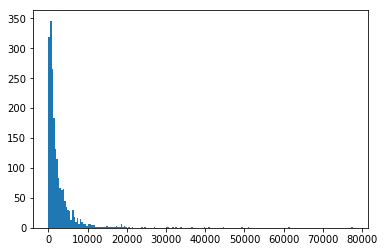

In [50]:
plt.hist(twitter_archive_master.retweet_count, bins = 'auto')
plt.show()

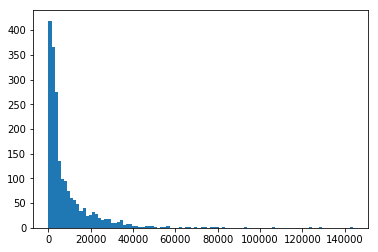

In [51]:
plt.hist(twitter_archive_master.favorite_count, bins = 'auto')
plt.show()

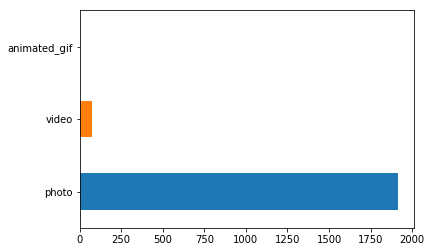

photo           1917
video             74
animated_gif       3
Name: media1, dtype: int64

In [52]:
twitter_archive_master.media1.value_counts().plot(kind='barh')
plt.show()
twitter_archive_master.media1.value_counts()

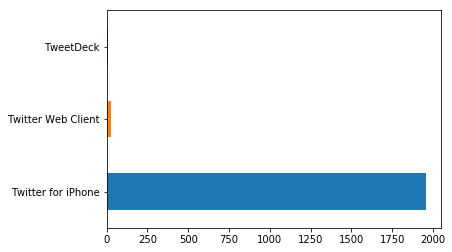

In [53]:
twitter_archive_master.source.value_counts().plot(kind='barh')
plt.show()

In [54]:
twitter_archive_master[twitter_archive_master.retweet_count > 30000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweet_count,favorite_count,media1,media2,media3,media4,url,extra_url,media_count,url_count
66,879415818425184262,None,None,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,44777,106269,video,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818...,None,1,1
135,866450705531457537,None,None,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,36628,124619,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,None,2,1
169,859196978902773760,None,None,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,31919,92716,video,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,None,1,1
413,822872901745569793,None,None,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,49324,143818,photo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,None,1,1
449,819004803107983360,None,None,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,41147,93928,photo,photo,photo,photo,https://twitter.com/dog_rates/status/819004803...,None,4,1
459,817827839487737858,None,None,2017-01-07 20:18:46,Twitter for iPhone,This is Buddy. He ran into a glass door once. ...,30518,56588,video,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817827839...,None,1,1
534,807106840509214720,None,None,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,61340,123353,video,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,None,1,1
537,806629075125202948,None,None,2016-12-07 22:38:52,Twitter for iPhone,"""Good afternoon class today we're going to lea...",39625,82440,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/806629075...,None,2,1
870,761672994376806400,None,None,2016-08-05 21:19:27,Twitter for iPhone,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,32499,53821,video,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994...,None,1,1
1039,744234799360020481,None,None,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,77625,128602,video,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,None,1,1


In [55]:
twitter_archive_master[twitter_archive_master.favorite_count > 60000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweet_count,favorite_count,media1,media2,media3,media4,url,extra_url,media_count,url_count
7,890729181411237888,None,None,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,19122,65772,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,None,2,1
23,887473957103951883,None,None,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch...,18439,69338,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,None,2,1
38,884925521741709313,None,None,2017-07-12 00:01:00,Twitter for iPhone,This is Earl. He found a hat. Nervous about wh...,18666,77761,photo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884925521...,None,1,1
66,879415818425184262,None,None,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,44777,106269,video,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818...,None,1,1
77,877736472329191424,None,None,2017-06-22 03:54:17,Twitter for iPhone,This is Aja. She was just told she's a good do...,19475,80232,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/877736472...,None,2,1
115,870374049280663552,None,None,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,26975,83636,photo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,None,1,1
123,868880397819494401,None,None,2017-05-28 17:23:24,Twitter for iPhone,This is Walter. He won't start hydrotherapy wi...,14988,66628,photo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,None,1,1
135,866450705531457537,None,None,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,36628,124619,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,None,2,1
154,862096992088072192,None,None,2017-05-10 00:08:34,Twitter for iPhone,We only rate dogs. Please don't send perfectly...,24446,76618,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,None,2,1
169,859196978902773760,None,None,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,31919,92716,video,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,None,1,1


In [56]:
twitter_archive_master[~twitter_archive_master.extra_url.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweet_count,favorite_count,media1,media2,media3,media4,url,extra_url,media_count,url_count
6,890971913173991426,None,None,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,2098,11892,photo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890971913...,https://gofundme.com/ydvmve-surgery-for-jax,1,2
27,886736880519319552,None,None,2017-07-16 23:58:41,Twitter for iPhone,This is Mingus. He's a wonderful father to his...,3337,12106,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/886736880...,https://www.gofundme.com/mingusneedsus,2,2
75,878281511006478336,None,None,2017-06-23 16:00:04,Twitter for iPhone,Meet Shadow. In an attempt to reach maximum zo...,1313,7784,photo,NaN,NaN,NaN,https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511...,1,2
98,873213775632977920,None,None,2017-06-09 16:22:42,Twitter for iPhone,This is Sierra. She's one precious pupper. Abs...,1622,7317,photo,photo,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,https://twitter.com/dog_rates/status/873213775...,2,2
114,870656317836468226,None,None,2017-06-02 15:00:16,Twitter for iPhone,This is Cody. He zoomed too aggressively and t...,2726,12584,photo,photo,photo,photo,https://www.gofundme.com/help-fix-codys-torn-acl,https://twitter.com/dog_rates/status/870656317...,4,2
126,868552278524837888,None,None,2017-05-27 19:39:34,Twitter for iPhone,Say hello to Cooper. His expression is the sam...,2169,10345,photo,photo,NaN,NaN,https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278...,2,2
150,863062471531167744,None,None,2017-05-12 16:05:02,Twitter for iPhone,Say hello to Quinn. She's quite the goofball. ...,2591,8767,photo,photo,photo,photo,https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471...,4,2
161,860563773140209665,None,None,2017-05-05 18:36:06,Twitter for iPhone,Meet Lorenzo. He's an avid nifty hat wearer an...,2268,7722,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/860563773...,https://www.gofundme.com/help-lorenzo-beat-cancer,2,2
177,857393404942143489,None,None,2017-04-27 00:38:11,Twitter for iPhone,"Instead of the usual nightly dog rate, I'm sha...",1726,6120,photo,photo,photo,photo,https://twitter.com/dog_rates/status/857393404...,https://www.gofundme.com/meeko-needs-heart-sur...,4,2
205,852912242202992640,None,None,2017-04-14 15:51:39,Twitter for iPhone,Meet Benny. He likes being adorable and making...,1982,9471,photo,photo,NaN,NaN,https://twitter.com/dog_rates/status/852912242...,https://www.gofundme.com/bennys-medical-bills,2,2


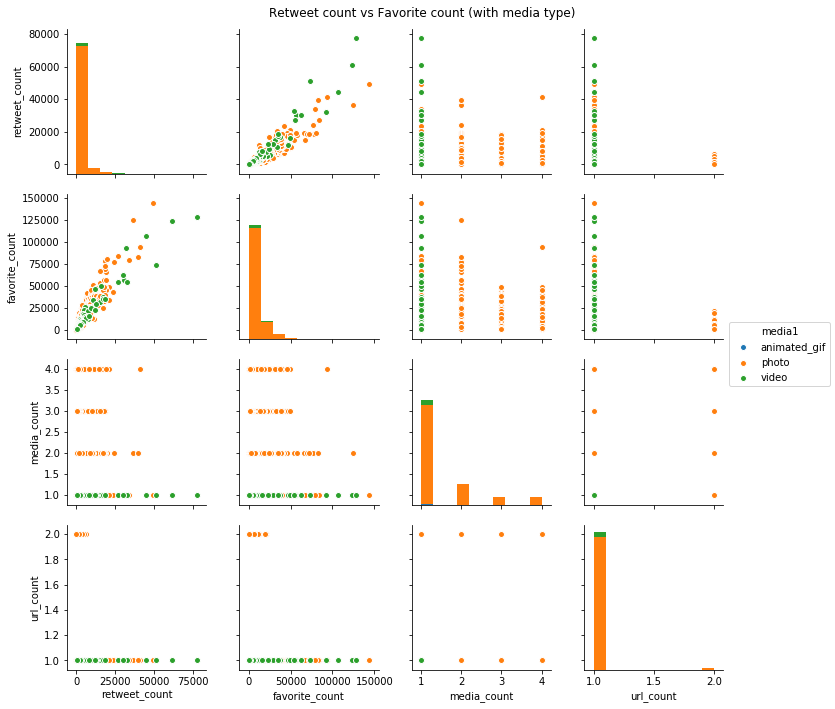

In [57]:
import seaborn as sns
g = sns.pairplot(twitter_archive_master[['retweet_count','favorite_count','media1','media_count', 'url_count']],
             hue= "media1")
plt.subplots_adjust(top = 0.95)
g.fig.suptitle('Retweet count vs Favorite count (with media type)')
plt.show()
# g.savefig('tweets.png')

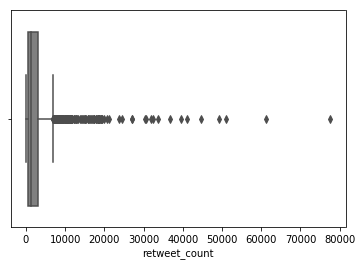

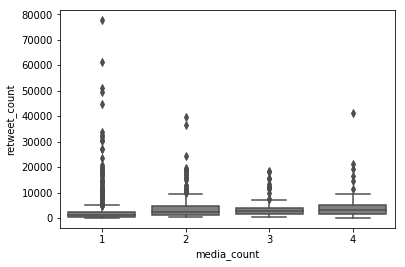

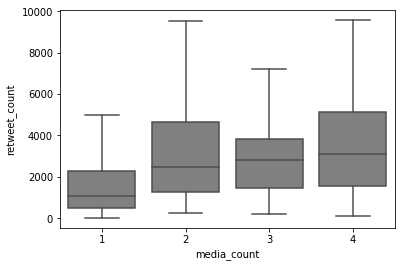

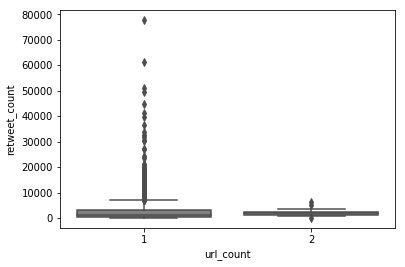

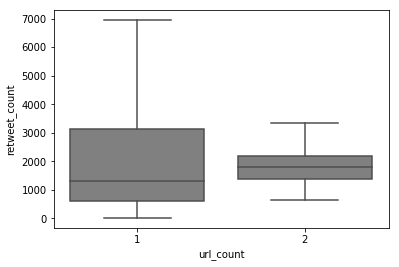

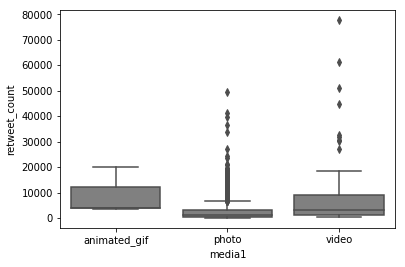

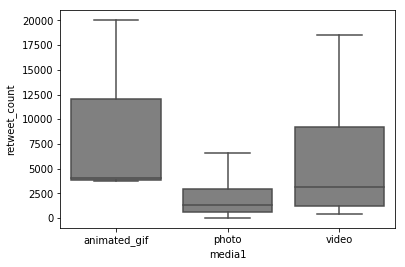

In [60]:
sns.boxplot(x = 'retweet_count', data = twitter_archive_master, color = 'gray')
plt.savefig('rt_count.png')
plt.show()
sns.boxplot(x = 'media_count', y = 'retweet_count', data = twitter_archive_master, color= 'gray')
plt.savefig('media_outliers.png')
plt.show()
sns.boxplot(x = 'media_count', y = 'retweet_count', data = twitter_archive_master, showfliers = False, color= 'gray')
plt.savefig('media_nooutliers.png')
plt.show()
sns.boxplot(x = 'url_count', y = 'retweet_count', data = twitter_archive_master, color = 'gray')
plt.savefig('url_outliers.png')
plt.show()
sns.boxplot(x = 'url_count', y = 'retweet_count', data = twitter_archive_master, showfliers = False, color = 'gray')
plt.savefig('url_nooutliers.png')
plt.show()
sns.boxplot(x = 'media1', y = 'retweet_count', data = twitter_archive_master, color = 'gray')
plt.savefig('type_outliers.png')
plt.show()
sns.boxplot(x = 'media1', y = 'retweet_count', data = twitter_archive_master, showfliers = False, color = 'gray')
plt.savefig('type_nooutliers.png')
plt.show()

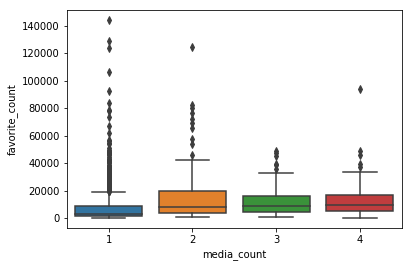

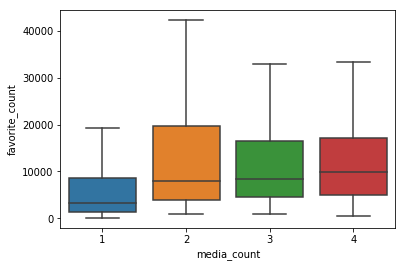

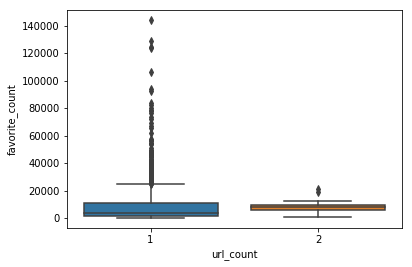

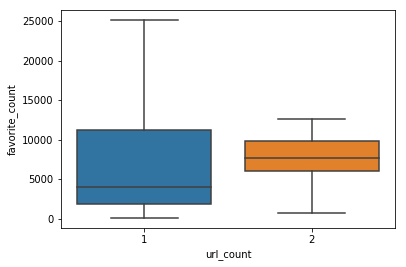

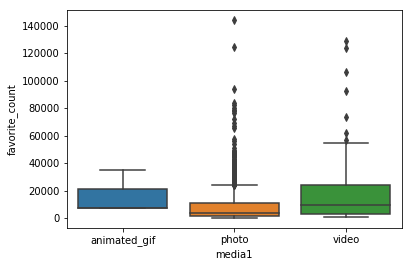

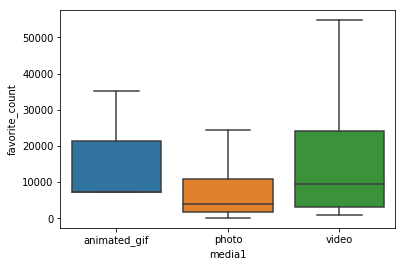

In [59]:
sns.boxplot(x = 'media_count', y = 'favorite_count', data = twitter_archive_master)
plt.show()
sns.boxplot(x = 'media_count', y = 'favorite_count', data = twitter_archive_master, showfliers = False)
plt.show()
sns.boxplot(x = 'url_count', y = 'favorite_count', data = twitter_archive_master)
plt.show()
sns.boxplot(x = 'url_count', y = 'favorite_count', data = twitter_archive_master, showfliers = False)
plt.show()
sns.boxplot(x = 'media1', y = 'favorite_count', data = twitter_archive_master)
plt.show()
sns.boxplot(x = 'media1', y = 'favorite_count', data = twitter_archive_master, showfliers = False)
plt.show()

### Summary

- Favorite and retweet counts seem to be strongly positively correlated. There are ususally more favorites than retweets.
- Considering that there were less videos to photos (74 to 1917) as the first media posted, it does seem that videos are retweeted and favorited more than photos.
- At first glance, the extra url does not seem to affect retweets or favorite counts. Most extra url's are gofundme links to help fund the dog's surgery. Digging deeper, the average retweet and favorite counts are actually higher.
- At first glance, having more media seems to drop retweet counts. Digging deeper, the average retweet and favorite counts are actually higher.

### References

- [Status object](https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json)
- [Write to file loop](https://stackoverflow.com/questions/11198718/writing-to-a-file-in-a-for-loop)
- [Empty lines](https://stackoverflow.com/questions/7896495/python-how-to-check-if-a-line-is-an-empty-line/7896585)
- [Multiple column type change](https://stackoverflow.com/questions/28910851/python-pandas-changing-some-column-types-to-categories)
- [First letter lower case in dataframe](https://stackoverflow.com/questions/43145023/how-to-check-if-first-character-in-a-python-dataframe-column-is-a-digit)
- [Add title Seaborn](https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot)
- [Remove outliers](https://stackoverflow.com/questions/35131798/tweaking-seaborn-boxplot)
- Pandas/Matplotlib/Seaborn documentation